## Keystroke labels

To train a keystroke prediction system, we've recorded data from a user while typing on a real keyboard. Each dataset contains simultaneous recordings of EMG and the keystrokes the user typed (with timing information).

This is an exploratory exercise focusing on the keystroke data (labels). We can ignore the EMG signal and sample timing for now.

PS - if not already installed in the environment, you might need to install those python moduels: `numpy`, `itertools`, `string`

In [9]:
import numpy as np

labels = np.load('../../../../Downloads/labels.npy')
labels.shape

(167891, 97)

`labels` is a `np.ndarray` of num samples x num labels (where num samples is sampled at 100 hz)

The labels are binary indicator vectors, indexes the same as the array `ALLOWED_ASCII`, which contains the corresponding ascii value.

In [63]:
import itertools
import string

ALLOWED_ASCII = list(
    itertools.chain(
        map(ord, string.ascii_letters),
        map(ord, string.digits),
        map(ord, string.punctuation),
        [8, 13, 32],  # backspace, return, space
    ))
len(ALLOWED_ASCII)

97

In [64]:
# An example list of ascii values of each label class:
[chr(c) for c in ALLOWED_ASCII][:10]

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

The goal here is to parse the text encoded in labels dataset such that it shows up as a human readable sentence.

In [11]:
result = np.where(labels == 1)

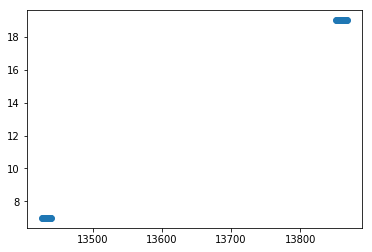

In [24]:
x = result[0][:30]
y = result[1][:30]
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()

In [14]:
labels[13427]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [36]:
multi_key_press = np.where(np.sum(labels, axis=1) > 1)
multi_key_press[0][:5]

array([25914, 25915, 25916, 26608, 26609])

In [34]:
sums = np.sum(labels[multi_key_press], axis=1)
sums[:5]

array([2., 2., 2., 2., 2.])

In [41]:
key_press = [i for i in range(labels.shape[0]) if np.sum(labels[i]) > np.sum(labels[i-1])]
len(key_press)

4141

In [43]:
letter_ix = labels[key_press]

In [46]:
letter = np.where(letter_ix)
letter

(array([   0,    1,    2, ..., 4138, 4139, 4140]),
 array([ 7, 19, 95, ...,  7,  4, 95]))

In [75]:
typed = np.array(ALLOWED_ASCII)[letter[1]]

In [81]:
typed_sentences = ''.join([chr(c) for c in typed]).replace('\r', '\n')

In [82]:
print(typed_sentences)

ht
d
d
t
j
f
t
d
x
m
e
i
y
x
s
b
w
y
f
h
x
v
y
f
k
c
p
r
m
q
the van rensselaers, orr randolphs, orr hardicanutes.  andd more than all, if justt prervious to putting your hand into the tarpot, you have been lording it as a country schoolmaster, mkaing the tallest boys stand in awe of you.

inhaling the disengaged air in the open atmosphere.  wherefore the necessity for his peridoical visits to the upper world.  but he cannot in any degree breathe through his mouth, for, in hiss ordinary attitude, the sperm whales mouth is buried at least eight feet benath

macb. twell then,
now have you considerd off my speeches kknow, that it wass he, in thee times past, which held ytyou so underr fortune, which you thought had been ourr innocent selfe. this i made good to ytyuu, inn our last conference, past in the probation, with you how you were borne in hand
world, accordiing to the prince of the ower of theair, the spirit that now worketh in thee children of idsobedience among whom also wee all h